In [6]:
import numpy as np
import pandas as pd
import json
from epilepsypcm.utils.outcome_params import node_location, early_propogation, irritative_zone

from epilepsypcm.utils.make_df import make_df, get_df_list, concat_dfs
from epilepsypcm.models.base_models import *
from sklearn.metrics import auc

all_positive_patients = pd.read_csv("newDF.csv", sep = ',').reset_index(drop = True)

In [7]:
print(all_positive_patients["outcome"].value_counts())
all_positive_patients.head()

0.0    268
1.0     41
Name: outcome, dtype: int64


,Unnamed: 0,Channels,outcome,SigResp,SigStim,N1RespAvg,N1RespSDV,N2RespAvg,N2RespSDV,P2RespAvg,P2RespSDV,N1StimAvg,N1StimSDV,N2StimAvg,N2StimSDV,P2StimAvg,P2StimSDV
0,0,LA9_LA10,0.0,0.000000,0.250000,1.530459,1.134169,2.040546,1.369091,1.304096,0.892887,7.178516,10.790559,6.536859,6.383906,5.785279,7.331337
1,1,LAH1_LAH2,1.0,0.076923,0.250000,7.062089,20.678040,3.320937,2.795194,2.178348,2.563587,7.883750,16.334814,4.921208,3.029861,2.352152,1.803711
2,2,LAH8_LAH9,0.0,0.307692,0.125000,4.032683,2.995624,3.450575,2.883998,2.376435,2.139730,2.505806,2.164878,2.190308,1.489418,2.033410,2.112725
3,3,LPH1_LPH2,0.0,0.115385,0.333333,6.522655,17.219698,3.369771,3.506524,2.281413,3.303814,6.505212,8.264811,4.630948,3.574869,4.187831,3.626223
4,4,LPH7_LPH8,0.0,0.307692,0.083333,7.304854,10.728727,4.610356,4.159990,3.468193,2.645476,2.823084,2.925869,1.606341,1.075715,1.461462,1.012732


Random Forest - Number of mislabeled points out of a total 78 points : 10
Random Forest - Number of mislabeled points out of a total 78 points : 11
Random Forest - Number of mislabeled points out of a total 78 points : 11
0.0    259
1.0     41
Name: outcome, dtype: int64
Random Forest - Number of mislabeled points out of a total 75 points : 9
Random Forest - Number of mislabeled points out of a total 75 points : 10
Random Forest - Number of mislabeled points out of a total 75 points : 10


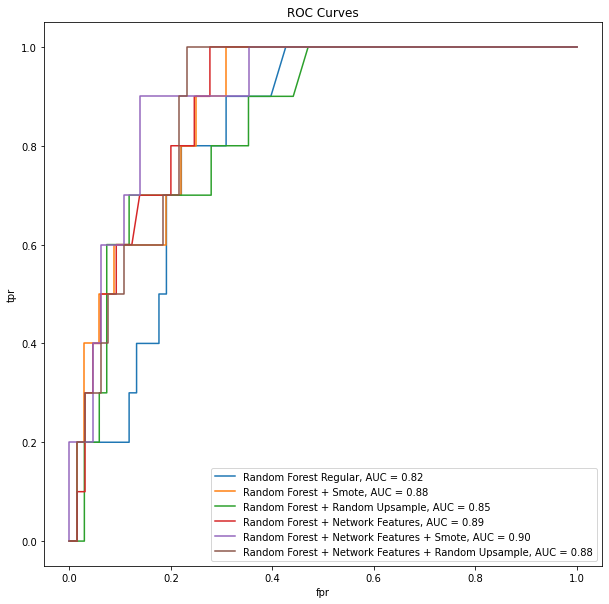

In [8]:
all_positive_patients = pd.read_csv("newDF.csv", sep = ',').reset_index(drop = True)

X_list = ["Channels","SigResp", "N1RespAvg", "N1RespSDV", "N2RespAvg", "N2RespSDV", "P2RespAvg", "P2RespSDV", 
          "SigStim", "N1StimAvg", "N1StimSDV", "N2StimAvg", "N2StimSDV", "P2StimAvg", "P2StimSDV"]

plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("ROC Curves")
plt.xlabel("fpr")
plt.ylabel("tpr")

# REGULAR FEATURES

#random forest regular
smote = False
max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Random Forest Regular, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#random forest SMOTE
smote = True
max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Random Forest + Smote, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')


#random forest random upsample
smote = "resample"
max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Random Forest + Random Upsample, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')


# REGULAR FEATURES + NETWORK FEATURES

all_positive_patients = pd.read_csv("networkfeaturesfixed.csv", sep = ',').reset_index(drop = True)

print(all_positive_patients["outcome"].value_counts())
all_positive_patients.head()

X_list = ["Channels", "SigResp", "N1RespAvg", "N1RespSDV", "N2RespAvg", "N2RespSDV", "P2RespAvg", "P2RespSDV", 
          "SigStim", "N1StimAvg", "N1StimSDV", "N2StimAvg", "N2StimSDV", "P2StimAvg", "P2StimSDV", "EV", "Closeness"]

#random forest with network features
smote = False
max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Random Forest + Network Features, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#random forest with network features SMOTE
smote = True
max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Random Forest + Network Features + Smote, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')


#random forest with network features random upsample
smote = "resample"
max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Random Forest + Network Features + Random Upsample, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')


Random Forest - Number of mislabeled points out of a total 78 points : 10
Random Forest - Number of mislabeled points out of a total 78 points : 11
Random Forest - Number of mislabeled points out of a total 78 points : 11
0.0    259
1.0     41
Name: outcome, dtype: int64
Random Forest - Number of mislabeled points out of a total 75 points : 9
Random Forest - Number of mislabeled points out of a total 75 points : 11
Random Forest - Number of mislabeled points out of a total 75 points : 11


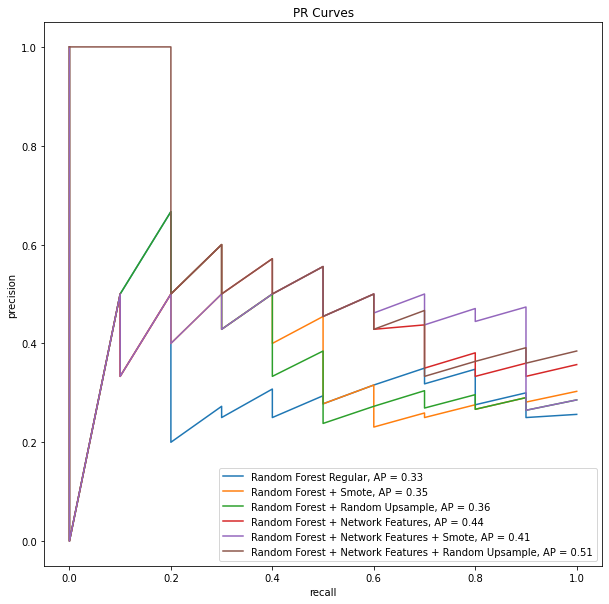

In [9]:
all_positive_patients = pd.read_csv("newDF.csv", sep = ',').reset_index(drop = True)

X_list = ["Channels","SigResp", "N1RespAvg", "N1RespSDV", "N2RespAvg", "N2RespSDV", "P2RespAvg", "P2RespSDV", 
          "SigStim", "N1StimAvg", "N1StimSDV", "N2StimAvg", "N2StimSDV", "P2StimAvg", "P2StimSDV"]

plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("PR Curves")
plt.xlabel("recall")
plt.ylabel("precision")

# REGULAR FEATURES

#random forest regular
smote = False
max_depth = 10
rf, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Random Forest Regular, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#random forest + smote
smote = True
max_depth = 10
rf, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Random Forest + Smote, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#random forest + random upsample
smote = "resample"
max_depth = 10
rf, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Random Forest + Random Upsample, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')



# REGULAR FEATURES + NETWORK FEATURES

all_positive_patients = pd.read_csv("networkfeaturesfixed.csv", sep = ',').reset_index(drop = True)

print(all_positive_patients["outcome"].value_counts())
all_positive_patients.head()

X_list = ["Channels", "SigResp", "N1RespAvg", "N1RespSDV", "N2RespAvg", "N2RespSDV", "P2RespAvg", "P2RespSDV", 
          "SigStim", "N1StimAvg", "N1StimSDV", "N2StimAvg", "N2StimSDV", "P2StimAvg", "P2StimSDV", "EV", "Closeness"]

#random forest + network features
smote = False
max_depth = 10
rf, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Random Forest + Network Features, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#random forest + network features + smote
smote = True
max_depth = 10
rf, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Random Forest + Network Features + Smote, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#random forest + network features + random upsample
smote = "resample"
max_depth = 10
rf, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Random Forest + Network Features + Random Upsample, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

# RF - SMOTE

In [11]:
X_list = ["Channels", "SigResp", "N1RespAvg", "N1RespSDV", "N2RespAvg", "N2RespSDV", "P2RespAvg", "P2RespSDV", 
          "SigStim", "N1StimAvg", "N1StimSDV", "N2StimAvg", "N2StimSDV", "P2StimAvg", "P2StimSDV"]

Random Forest - Number of mislabeled points out of a total 75 points : 11
[00:32:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:32:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost - Number of mislabeled points out of a total 75 points : 14


/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


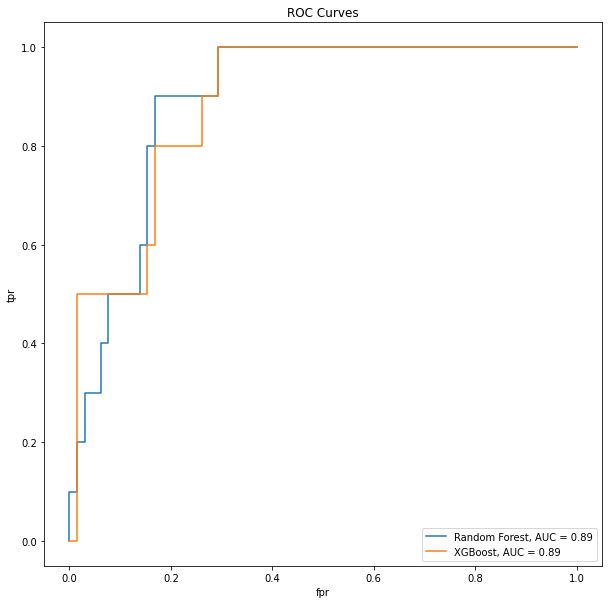

In [12]:
# stim + resp channels

smote = True

plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("ROC Curves")
plt.xlabel("fpr")
plt.ylabel("tpr")

#random forest
max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Random Forest, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#xgboost
learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = xgboost(all_positive_patients, X_list, learning_rate, max_depth, n_estimators, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "XGBoost, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')


In [14]:
#getting model and stats
from sklearn.metrics import confusion_matrix

smote = True

max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)

# Printing Metrics
optimal_thresh = roc_thresholds[np.argmax(tpr - fpr)]
print("Optimal roc threshold: ", optimal_thresh)
y_rounded = np.where(y_pred > optimal_thresh, 1, 0)

tn, fp, fn, tp = confusion_matrix(y_test, y_rounded).ravel()

print("Accuracy: ", (tp + tn)/(tp + fp + tn + fn))
print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))

Random Forest - Number of mislabeled points out of a total 75 points : 11
Optimal roc threshold:  0.3306601387196048
Accuracy:  0.8133333333333334
Sensitivity:  0.9
Specificity:  0.8


In [33]:
# getting labels

epilepsy_normal = []
channels_normal = []
correct_normal = []

non_epilepsy = []
channels_non = []
correct_non = []

i = 0
while i < len(y_test):
    if list(y_test)[i] == 1.0:
        epilepsy_normal.append(y_pred[i])
        channels_normal.append(test_channels[i])
        
        if y_pred[i] >= optimal_thresh: #seeing if prediction was correct for true positives
            
            no_digits = ''.join(i for i in test_channels[i] if not i.isdigit()) #dropping digits from channel name
            channel_split = no_digits.split("_")
            for key in node_location.keys():
                if (channel_split[0] == key) | (channel_split[1] == key): # if channel matches node label, label it
                    label = node_location[key]
            correct_normal.append("Correctly labeled - " + label)
            
        elif y_pred[i] < optimal_thresh:
            
            no_digits = ''.join(i for i in test_channels[i] if not i.isdigit()) #dropping digits from channel name
            channel_split = no_digits.split("_")
            for key in node_location.keys():
                if (channel_split[0] == key) | (channel_split[1] == key): # if channel matches node label, label it
                    label = node_location[key]
            correct_normal.append("Mislabeled - " + label)
            
    elif list(y_test)[i] == 0.0:
        non_epilepsy.append(y_pred[i])
        channels_non.append(test_channels[i])
        
        if y_pred[i] < optimal_thresh: #seeing if prediction was correct for true negatives
            
            no_digits = ''.join(i for i in test_channels[i] if not i.isdigit()) #dropping digits from channel name
            channel_split = no_digits.split("_")
            for key in node_location.keys():
                if (channel_split[0] == key) | (channel_split[1] == key): # if channel matches node label, label it
                    label = node_location[key]
            correct_non.append("Correctly labeled - " + label)            
            
        elif y_pred[i] >= optimal_thresh:
            
            no_digits = ''.join(i for i in test_channels[i] if not i.isdigit()) #dropping digits from channel name
            channel_split = no_digits.split("_")
            for key in node_location.keys():
                if (channel_split[0] == key) | (channel_split[1] == key): # if channel matches node label, label it
                    label = node_location[key]
            correct_non.append("Mislabeled - " + label)    
    
    i += 1
    
correct_normal_ordered = [x for _,x in sorted(zip(epilepsy_normal, correct_normal), reverse = True)]
correct_non_ordered = [x for _,x in sorted(zip(non_epilepsy, correct_non), reverse = True)]
            
print("\n")
print("Positive labels")            
print(*correct_normal_ordered, sep = "\n")

print("\n")
print("Negative labels")
print(*correct_non_ordered, sep = "\n")



Positive labels
Correctly labeled - left posterior hippocampus
Correctly labeled - Left inferior posterior frontal depth
Correctly labeled - left anterior hippocampus
Correctly labeled - Left inferior frontal
Correctly labeled - left amygdala
Correctly labeled - Left orbitofrontal depth
Correctly labeled - right posterior hippocampus
Correctly labeled - Right anterior temporal inferior
Correctly labeled - Right amygdala depth
Correctly labeled - left basal temporal


Negative labels
Mislabeled - Basal temporal posterior-temporal
Mislabeled - Left amygdala depth
Mislabeled - Left fronto-temporal grid
Mislabeled - Left nodule E
Mislabeled - left amygdala
Mislabeled - Left fronto-temporal grid
Mislabeled - Right frontal grid
Mislabeled - Left fronto-temporal grid
Mislabeled - left posterior hippocampus
Mislabeled - Left sensory area
Mislabeled - Left fronto-temporal grid
Mislabeled - Left fronto-temporal grid
Mislabeled - Left superior frontal depth
Correctly labeled - right posterior h